### Theoretical methods of deep learning: Homework assignment 5

Submit solution by uploading to canvas, **by Friday, December 4th, 23:00**

**The task.** 

1. Consider a deep linear network with the constant width $d=1$. Suppose that the ground truth linear map is given by $y=rx.$ Will the gradient descent converge to the true linear map? Consider two scenarios: $r$ is positive or negative. Also, consider two initialization options:
 - The initial values of the weights are all equal to 1.
 - The initial values of the weights are different positive numbers.  

2. Verify your predictions form item 1 experimentally, plot the trajectories of the weights and loss values.  

3. Consider a deep linear network with constant width $d>1$. Suppose that the ground truth linear map is given by $\mathbf y=R\mathbf x$ with some $R=R^*\in\mathbb R^{d\times d},$ and the covariance matrix $\Sigma$ of input vectors $\mathbf x$ is scalar. Suppose that the weight matrices $W_k$ describing transitions between layers are initialized by scalar matrices ($(W_k)_{mn}=c_k\delta_{mn}$). What can we say theoretically about convergence of gradient descent?

4. Verify your theoretical predictions from item 3 experimentally. Implement a deep linear network (e.g., with depth $K=5$ and width $d=5$). Generate a big random training set  using a standard Gaussian distribution for the values of $\mathbf x$, or use a deterministic set with a scalar covariance matrix $\Sigma$. Generate a random symmetric matrix $R$. Consider two options for initializing $W_k$: in one case initialize them by identity matrices; in the other case initialize them by scalar matrices $c_k\delta_{mn}$, with $c_k$ uniformly distributed between $0.5$ and $1.5$. Perform gradient descent and observe if convergence pattern agrees with the theoretically expected. 

## 1

* $L(x, \textbf{w}) = \big((\Pi_{i=1}^{depth} w_i)x - rx\big)^2$
* $ \frac{\partial L}{\partial w_i}(x, \textbf{w}) = 2x \Pi_{j \neq i} w_j \big((\Pi_{i=1}^{depth} w_i)x - rx\big)$
* $ \frac{\partial L}{\partial \textbf w}(x, \textbf{w}) = 0$ in four cases: $x = 0$, $\big((\Pi_{i=1}^{depth} w_i)x - rx\big) = 0$, $\textbf w = 0$, $w_i = w_j = 0$ for $i \neq j$.
* The first case is trivial, the second corresponds to the global minimum, the third and the fourth are stationary points.
* Let's consider the initialization of weights with ones. In this case $ \frac{\partial L}{\partial w_i}(x, \textbf{w})$ are equal for all $i$. Hence, the values of $w_i$ are also equal at each optimization step. If $r < 0$, the optimization trajectory of weights passes the origin, in which the gradient vanishes. Hence, gradient descent cannot converge to the true map.
* In all the other cases the trajectory does not go through the origin, so the process will converge. The fourth case is also improbable in the case of numerical computation which is confirmed by the simulations fron the second point (for the given set of parameters the process always converged in my experiments, except the case of $r<0$ and initialization with ones).

## 2. Let's check!

### Define the model

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
class linear_net():
    def __init__(self, depth=5, init='ones'):
        if init not in ['ones', 'rand']:
            raise ValueError('Invalid initialization mode')
            
        self.init = init
        self.depth = depth
        if self.init == 'ones':
            self.weights = np.ones((depth, ))
        else:
            self.weights = np.random.uniform(low=1, high=3, size=(depth, ))
            
        self.out = None
        self.grads = None
    
    def forward(self, x):
        self.out = x
        for w in self.weights:
            self.out = self.out * w
    
    def backward(self, x, true_y):
        self.grads = np.ones_like(self.weights)
        for i in range(self.depth):
            for j in range(self.depth):
                if j != i:
                    self.grads[i] *= self.weights[j]
                    
        self.grads = 2 * np.mean(np.outer(self.grads, x*(self.out-true_y)), axis=1)
    
    def gd_step(self, lr):
        self.weights = self.weights - lr * self.grads
        
    def loss(self, true_y):
        return np.mean(np.power(self.out-true_y, 2))

### $r>0$

In [3]:
# generate data
r = 10

X = np.random.uniform(low=-1, high=1, size=1000)
y = r * X

#### Initialization with ones

In [4]:
num_updates = 1000
depth = 5
init = 'ones'
lr = 1e-3

model = linear_net(depth=depth, init=init)
weight_history = np.empty((depth, num_updates+1))
loss_history = np.ones((num_updates+1, ))
weight_history[:, 0] = model.weights

for i in range(num_updates):
    if i % 100 == 0 and i != 0:
        lr /= 1
        
    model.forward(X)
    model.backward(X, y)
    model.gd_step(lr)
    weight_history[:, i+1] = model.weights
    loss_history[i+1] = model.loss(y)
    
print(f'fitted r: {np.prod(model.weights):.02f}, true r: {r}')

fitted r: 10.00, true r: 10


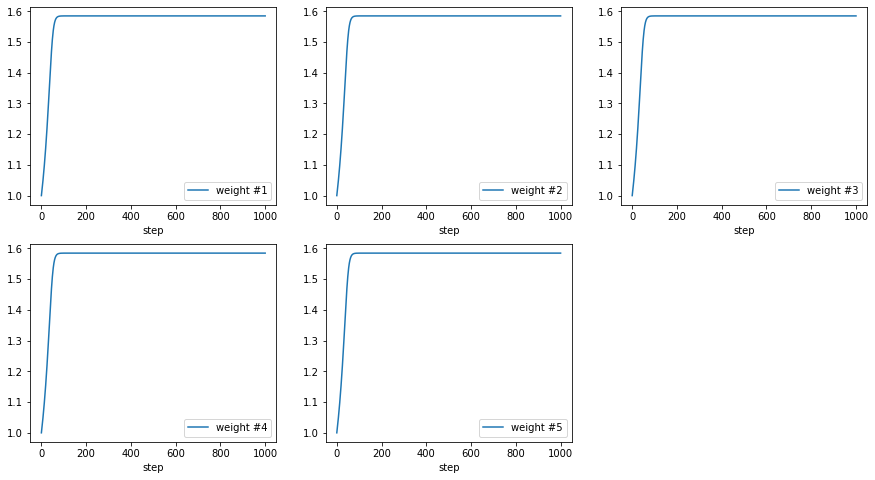

In [5]:
height = depth / 3

if depth%3 != 0:
    height += 1

plt.figure(figsize=(15, 3*height))
xs = list(range(num_updates+1))

for i in range(depth):
    plt.subplot(height, 3, i+1)
    plt.plot(xs, weight_history[i], label=f'weight #{i+1}')
    plt.xlabel('step')
    plt.legend()

plt.show()

Loss after training: 1.11e-28


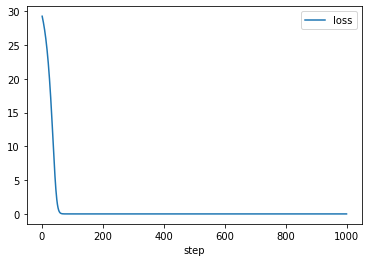

In [6]:
plt.plot(xs[1:], loss_history[1:], label='loss')
plt.xlabel('step')
plt.legend()
print(f'Loss after training: {loss_history[-1]:.02e}')
plt.show()

#### Uniform [1, 3] initialization

In [7]:
num_updates = 1000
depth = 5
init = 'rand'
lr = 1e-3

model = linear_net(depth=depth, init=init)
weight_history = np.empty((depth, num_updates+1))
loss_history = np.ones((num_updates+1, ))
weight_history[:, 0] = model.weights

for i in range(num_updates):
    if i % 100 == 0 and i != 0:
        lr /= 1
        
    model.forward(X)
    model.backward(X, y)
    model.gd_step(lr)
    weight_history[:, i+1] = model.weights
    loss_history[i+1] = model.loss(y)
    
print(f'fitted r: {np.prod(model.weights):.04f}, true r: {r}')

fitted r: 10.0000, true r: 10


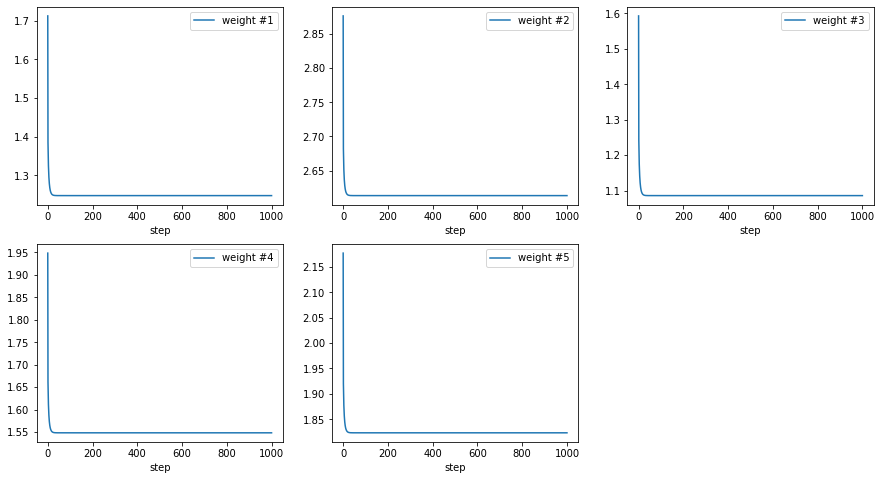

In [8]:
height = depth / 3

if depth%3 != 0:
    height += 1

plt.figure(figsize=(15, 3*height))
xs = list(range(num_updates+1))

for i in range(depth):
    plt.subplot(height, 3, i+1)
    plt.plot(xs, weight_history[i], label=f'weight #{i+1}')
    plt.xlabel('step')
    plt.legend()

plt.show()

Loss after training: 8.95e-29


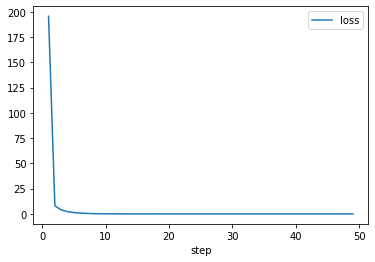

In [9]:
plt.plot(xs[1:50], loss_history[1:50], label='loss')
plt.xlabel('step')
plt.legend()
print(f'Loss after training: {loss_history[-1]:.02e}')
plt.show()

### $r < 0$

#### Initialization with ones

In [10]:
# generate data
r = -10

X = np.random.uniform(low=-1, high=1, size=1000)
y = r * X

In [11]:
num_updates = 1000
depth = 5
init = 'ones'
lr = 1e-3

model = linear_net(depth=depth, init=init)
weight_history = np.empty((depth, num_updates+1))
loss_history = np.ones((num_updates+1, ))
weight_history[:, 0] = model.weights

for i in range(num_updates):
    if i % 100 == 0 and i != 0:
        lr /= 1
        
    model.forward(X)
    model.backward(X, y)
    model.gd_step(lr)
    weight_history[:, i+1] = model.weights
    loss_history[i+1] = model.loss(y)
    
print(f'fitted r: {np.prod(model.weights):.04f}, true r: {r}')

fitted r: 0.0067, true r: -10


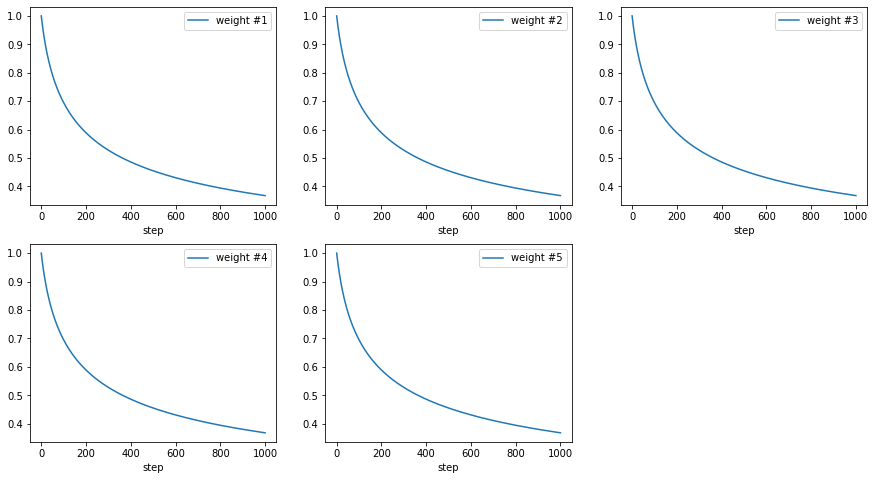

In [12]:
height = depth / 3

if depth%3 != 0:
    height += 1

plt.figure(figsize=(15, 3*height))
xs = list(range(num_updates+1))

for i in range(depth):
    plt.subplot(height, 3, i+1)
    plt.plot(xs, weight_history[i], label=f'weight #{i+1}')
    plt.xlabel('step')
    plt.legend()

plt.show()

Loss after training: 3.16e+01


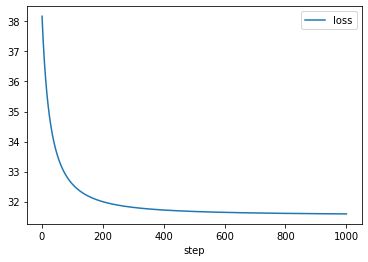

In [13]:
plt.plot(xs[1:], loss_history[1:], label='loss')
plt.xlabel('step')
plt.legend()
print(f'Loss after training: {loss_history[-1]:.02e}')
plt.show()

#### Uniform [1, 3] initialization

In [14]:
num_updates = 1000
depth = 5
init = 'rand'
lr = 1e-3

model = linear_net(depth=depth, init=init)
weight_history = np.empty((depth, num_updates+1))
loss_history = np.ones((num_updates+1, ))
weight_history[:, 0] = model.weights

for i in range(num_updates):
    if i % 100 == 0 and i != 0:
        lr /= 1
    
    model.forward(X)
    model.backward(X, y)
    model.gd_step(lr)
    weight_history[:, i+1] = model.weights
    loss_history[i+1] = model.loss(y)
    
print(f'fitted r: {np.prod(model.weights):.04f}, true r: {r}')

fitted r: -10.0000, true r: -10


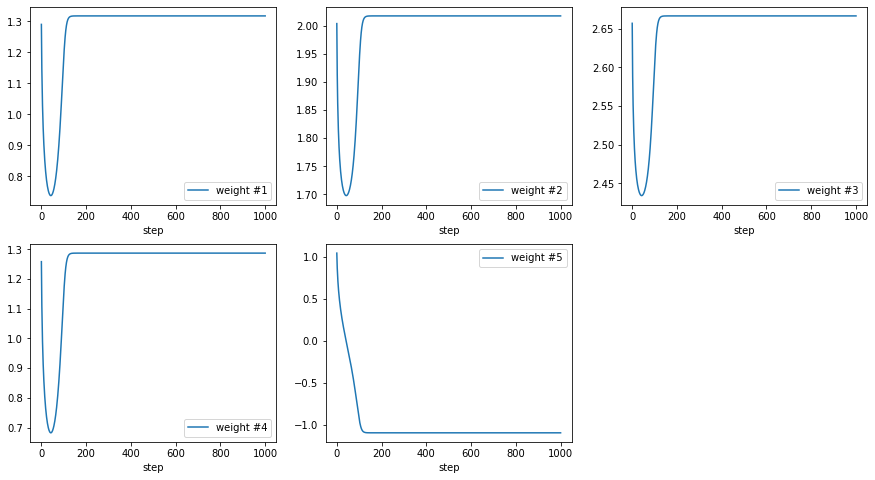

In [15]:
height = depth / 3

if depth%3 != 0:
    height += 1

plt.figure(figsize=(15, 3*height))
xs = list(range(num_updates+1))

for i in range(depth):
    plt.subplot(height, 3, i+1)
    plt.plot(xs, weight_history[i], label=f'weight #{i+1}')
    plt.xlabel('step')
    plt.legend()

plt.show()

#### Interesting dynamics!

Loss after training: 9.60e-29


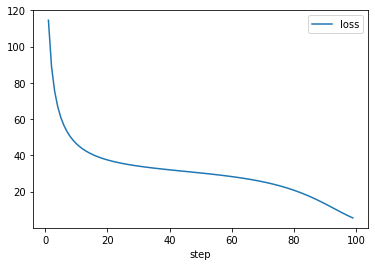

In [16]:
plt.plot(xs[1:100], loss_history[1:100], label='loss')
plt.xlabel('step')
plt.legend()
print(f'Loss after training: {loss_history[-1]:.02e}')
plt.show()

## 3

* As was derived in the lectures, in this case the dynamics decouples into $d$ independent one dimensional ways along each eigendirection. 
* The equation is as follows: $ \frac{\partial L}{\partial w_{ki}}(x_i, \textbf{w}_i) = 2x_i \Pi_{j \neq k} w_j \big((\Pi_{i=1}^{depth} w_{ki})x_i - r_ix_i\big)$ where $i$ indexes the eigendimensions and $k$ indexes layers.
* The same situation as in the first subtask, if $r_i$ is negative for some $i$, gradient descent may get stuck at $w_{ki}=0 \  \forall k$ in the case of initialization with ones. 

## 4 Let's check!

In [17]:
class linear_net():
    def __init__(self, d=3, depth=5, init='ones'):
        if init not in ['ones', 'rand']:
            raise ValueError('Invalid initialization mode')
            
        self.init = init
        self.depth = depth
        self.d = d
        if self.init == 'ones':
            self.weights = np.stack([np.eye(d) for i in range(depth)])
        else:
            self.weights = np.stack([np.random.uniform(0.5, 1.5)*np.eye(d) for i in range(depth)])
            
        self.out = None
        self.grads = None
    
    def forward(self, x):
        self.out = x
        for w in self.weights:
            self.out = w @ self.out
    
    def backward(self, x, true_y):
        self.grads = np.zeros_like(self.weights)
        for i in range(self.depth):
            dx = x
            dLdz = 2 * (self.out - true_y)
            for j in range(i):
                dx = self.weights[j] @ dx 
            for j in range(self.depth-1, i, -1):
                dLdz = self.weights[j].T @ dLdz
            
            self.grads[i] = dLdz @ dx.T / x.shape[1]
    
    def gd_step(self, lr):
        self.weights = self.weights - lr * self.grads
        
    def loss(self, true_y):
        return np.mean(np.linalg.norm(self.out-true_y, axis=0)**2)

#### Let's test the computation of gradients

In [18]:
d = 3
R = np.random.normal(size=(d, d))
R = R @ R.T

X = np.random.multivariate_normal(np.zeros((d, )), np.eye(d), size=1000).T
y = R @ X

depth = 5
init = 'rand'
model = linear_net(d=d, depth=depth, init=init)
model.forward(X)
model.backward(X, y)

num_grad = np.empty((d, d))
for i in range(d):
    for j in range(d):
        model.forward(X)
        a = model.loss(y)
        model.weights[3, i, j] = model.weights[3, i, j] + 0.0000001
        model.forward(X)
        b = model.loss(y)
        model.weights[3, i, j] = model.weights[3, i, j] - 0.0000001
        num_grad[i, j] = (b - a) * 10000000
        
np.allclose(num_grad, model.grads[3], atol=1e-4)

True

### $R \succ 0$

In [19]:
# generate data
d = 5
R = np.eye(d) + 0.1 * np.random.normal(size=(d, d))
R = R + R.T

X = np.random.multivariate_normal(np.zeros((d, )), np.eye(d), size=1000).T
y = R @ X

print(np.all(np.linalg.eigvals(R) > 0))

True


#### Initialization with eyes

In [20]:
batch_size = 1000
num_updates = 1000
depth = 5
init = 'ones'
lr = 1e-3
model = linear_net(d=d, depth=depth, init=init)
loss_history = np.ones((num_updates+1, ))
eigval_history = []

for i in range(num_updates):
    if i % 100 == 0 and i != 0:
        lr /= 1
        
    
    model.forward(X)
    model.backward(X, y)
    model.gd_step(lr)
    loss_history[i+1] = model.loss(y)
    R_pred = np.eye(d)
    for w in model.weights[::-1]:
        R_pred = R_pred @ w
    eigval_history.append(np.linalg.eigvals(R_pred))

eigval_history = np.array(eigval_history).T
R_pred = np.eye(d)
for w in model.weights[::-1]:
    R_pred = R_pred @ w

print(f'Norm of the difference: {np.linalg.norm(R_pred-R):.02e}')

Norm of the difference: 9.55e-10


Loss after training: 9.28e-19


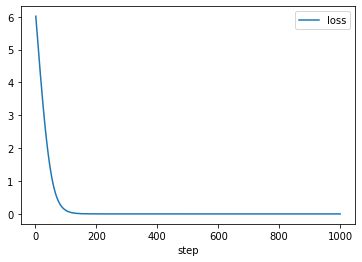

In [21]:
xs = list(range(num_updates+1))
plt.plot(xs[1:], loss_history[1:], label='loss')
plt.xlabel('step')
plt.legend()
print(f'Loss after training: {loss_history[-1]:.02e}')
plt.show()

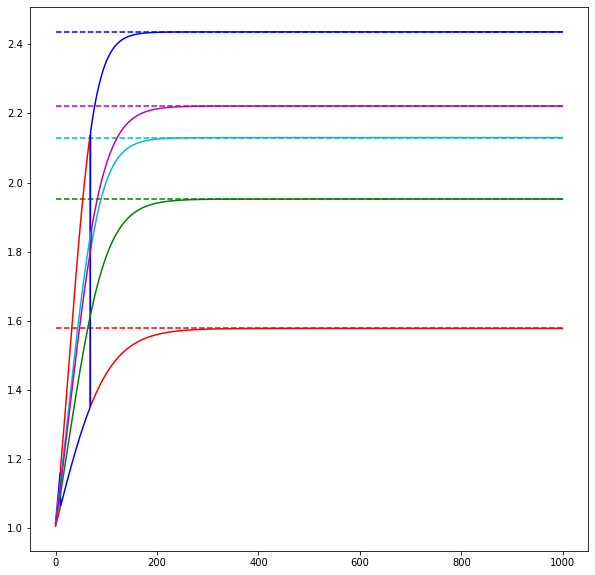

In [22]:
plt.figure(figsize=(10, 10))
eigvals = np.linalg.eigvals(R)
xs = list(range(eigval_history.shape[1]))
colors = ['r', 'b', 'g', 'c', 'm']
for i in range(d):
    plt.plot(eigval_history[i], color=colors[i])
    plt.hlines(eigvals[i], 0, len(xs), colors=colors[i], linestyles='dashed')

#### Random initialization

In [23]:
batch_size = 1000
num_updates = 1000
depth = 5
init = 'rand'
lr = 1e-3
model = linear_net(d=d, depth=depth, init=init)
loss_history = np.ones((num_updates+1, ))
eigval_history = []

for i in range(num_updates):
    if i % 100 == 0 and i != 0:
        lr /= 1
        
    
    model.forward(X)
    model.backward(X, y)
    model.gd_step(lr)
    loss_history[i+1] = model.loss(y)
    R_pred = np.eye(d)
    for w in model.weights[::-1]:
        R_pred = R_pred @ w
    eigval_history.append(np.linalg.eigvals(R_pred))

eigval_history = np.array(eigval_history).T
R_pred = np.eye(d)
for w in model.weights[::-1]:
    R_pred = R_pred @ w

print(f'Norm of the difference: {np.linalg.norm(R_pred-R):.02e}')

Norm of the difference: 3.21e-12


Loss after training: 1.05e-23


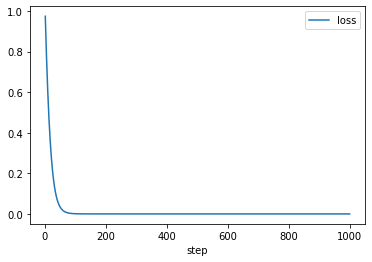

In [24]:
xs = list(range(num_updates+1))
plt.plot(xs[1:], loss_history[1:], label='loss')
plt.xlabel('step')
plt.legend()
print(f'Loss after training: {loss_history[-1]:.02e}')
plt.show()

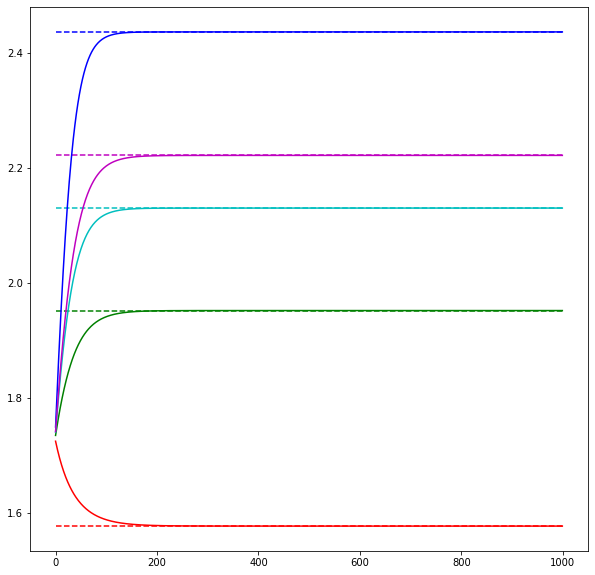

In [25]:
plt.figure(figsize=(10, 10))
eigvals = np.linalg.eigvals(R)
xs = list(range(eigval_history.shape[1]))
colors = ['r', 'b', 'g', 'c', 'm']
for i in range(d):
    plt.plot(eigval_history[i], color=colors[i])
    plt.hlines(eigvals[i], 0, len(xs), colors=colors[i], linestyles='dashed')

### $R \prec 0$

In [26]:
# generate data
d = 5
R = -np.eye(d) + 0.1 * np.random.normal(size=(d, d))
R = R + R.T

X = np.random.multivariate_normal(np.zeros((d, )), np.eye(d), size=1000).T
y = R @ X

print(np.all(np.linalg.eigvals(R) < 0))

True


#### Initialization with eyes

In [27]:
batch_size = 1000
num_updates = 100000
depth = 5
init = 'ones'
lr = 1e-3
model = linear_net(d=d, depth=depth, init=init)
loss_history = np.ones((num_updates+1, ))
eigval_history = []

for i in range(num_updates):
    if i % 100 == 0 and i != 0:
        lr /= 1
        
    
    model.forward(X)
    model.backward(X, y)
    model.gd_step(lr)
    loss_history[i+1] = model.loss(y)
    R_pred = np.eye(d)
    for w in model.weights[::-1]:
        R_pred = R_pred @ w
    eigval_history.append(np.linalg.eigvals(R_pred))

eigval_history = np.array(eigval_history).T
R_pred = np.eye(d)
for w in model.weights[::-1]:
    R_pred = R_pred @ w

print(f'Norm of the difference: {np.linalg.norm(R_pred-R):.02e}')

Norm of the difference: 1.46e+00


Loss after training: 2.09e+00


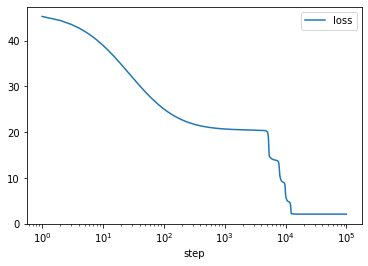

In [28]:
xs = list(range(num_updates+1))
plt.plot(xs[1:], loss_history[1:], label='loss')
plt.xlabel('step')
plt.xscale('log')
plt.legend()
print(f'Loss after training: {loss_history[-1]:.02e}')
plt.show()

/home/b30p9hn/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/b30p9hn/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/b30p9hn/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/b30p9hn/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/b30p9hn/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=

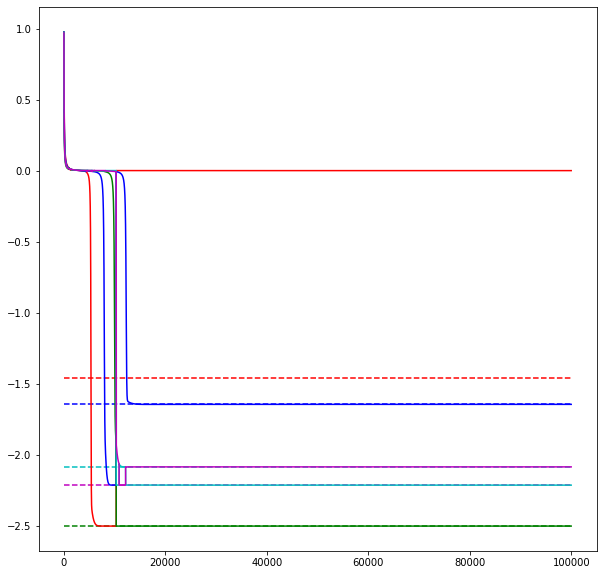

In [29]:
plt.figure(figsize=(10, 10))
eigvals = np.linalg.eigvals(R)
xs = list(range(eigval_history.shape[1]))
colors = ['r', 'b', 'g', 'c', 'm']
for i in range(d):
    plt.plot(eigval_history[i], color=colors[i])
    plt.hlines(eigvals[i], 0, len(xs), colors=colors[i], linestyles='dashed')

#### Random initialization

In [30]:
batch_size = 1000
num_updates = 100000
depth = 5
init = 'rand'
lr = 1e-3
model = linear_net(d=d, depth=depth, init=init)
loss_history = np.ones((num_updates+1, ))
eigval_history = []

for i in range(num_updates):
    if i % 100 == 0 and i != 0:
        lr /= 1
        
    
    model.forward(X)
    model.backward(X, y)
    model.gd_step(lr)
    loss_history[i+1] = model.loss(y)
    R_pred = np.eye(d)
    for w in model.weights[::-1]:
        R_pred = R_pred @ w
    eigval_history.append(np.linalg.eigvals(R_pred))

eigval_history = np.array(eigval_history).T
R_pred = np.eye(d)
for w in model.weights[::-1]:
    R_pred = R_pred @ w

print(f'Norm of the difference: {np.linalg.norm(R_pred-R):.02e}')

Norm of the difference: 2.35e-14


Loss after training: 5.31e-28


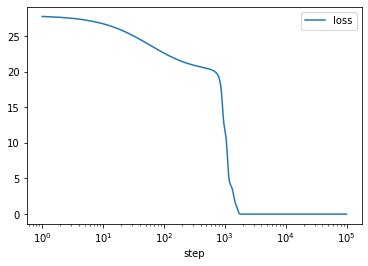

In [31]:
xs = list(range(num_updates+1))
plt.plot(xs[1:], loss_history[1:], label='loss')
plt.xlabel('step')
plt.xscale('log')
plt.legend()
print(f'Loss after training: {loss_history[-1]:.02e}')
plt.show()

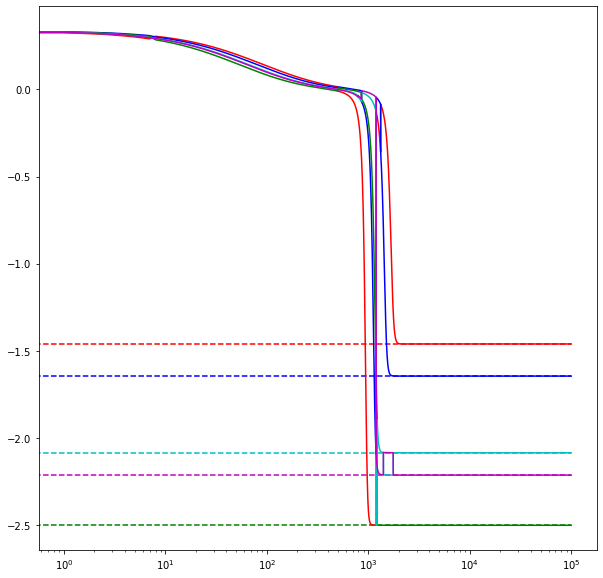

In [32]:
plt.figure(figsize=(10, 10))
eigvals = np.linalg.eigvals(R)
xs = list(range(eigval_history.shape[1]))
colors = ['r', 'b', 'g', 'c', 'm']
for i in range(d):
    plt.plot(eigval_history[i], color=colors[i])
    plt.hlines(eigvals[i], 0, len(xs), colors=colors[i], linestyles='dashed')

plt.xscale('log')

### $R$ is just a symmetric matrix

In [41]:
# generate data
d = 5
R = np.random.normal(size=(d, d))
R = R + R.T

X = np.random.multivariate_normal(np.zeros((d, )), np.eye(d), size=1000).T
y = R @ X

print(np.all(np.linalg.eigvals(R) < 0))
print(np.all(np.linalg.eigvals(R) > 0))

False
False


#### Initialization with eyes

In [42]:
batch_size = 1000
num_updates = 100000
depth = 5
init = 'ones'
lr = 1e-3
model = linear_net(d=d, depth=depth, init=init)
loss_history = np.ones((num_updates+1, ))
eigval_history = []

for i in range(num_updates):
    if i % 100 == 0 and i != 0:
        lr /= 1
        
    
    model.forward(X)
    model.backward(X, y)
    model.gd_step(lr)
    loss_history[i+1] = model.loss(y)
    R_pred = np.eye(d)
    for w in model.weights[::-1]:
        R_pred = R_pred @ w
    eigval_history.append(np.linalg.eigvals(R_pred))

eigval_history = np.array(eigval_history).T
R_pred = np.eye(d)
for w in model.weights[::-1]:
    R_pred = R_pred @ w

print(f'Norm of the difference: {np.linalg.norm(R_pred-R):.02e}')

Norm of the difference: 1.56e+00


Loss after training: 2.36


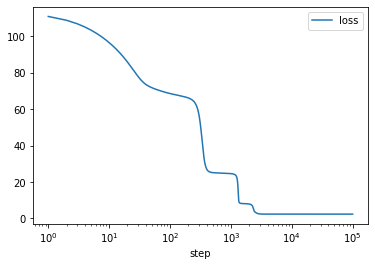

In [43]:
xs = list(range(num_updates+1))
plt.plot(xs[1:], loss_history[1:], label='loss')
plt.xlabel('step')
plt.xscale('log')
plt.legend()
print(f'Loss after training: {loss_history[-1]:.02f}')
plt.show()

/home/b30p9hn/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/b30p9hn/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/b30p9hn/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/b30p9hn/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/b30p9hn/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=

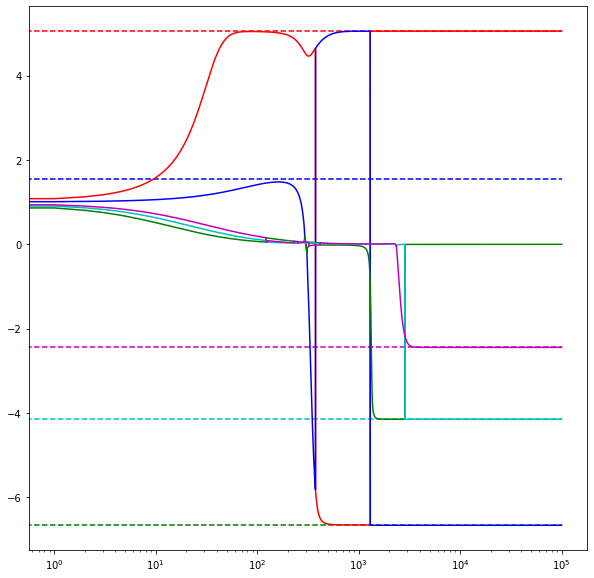

In [44]:
plt.figure(figsize=(10, 10))
eigvals = np.linalg.eigvals(R)
xs = list(range(eigval_history.shape[1]))
colors = ['r', 'b', 'g', 'c', 'm']
for i in range(d):
    plt.plot(eigval_history[i], color=colors[i])
    plt.hlines(eigvals[i], 0, len(xs), colors=colors[i], linestyles='dashed')

plt.xscale('log')

#### Random initialization

In [45]:
batch_size = 1000
num_updates = 100000
depth = 5
init = 'rand'
lr = 1e-3
model = linear_net(d=d, depth=depth, init=init)
loss_history = np.ones((num_updates+1, ))
eigval_history = []

for i in range(num_updates):
    if i % 100 == 0 and i != 0:
        lr /= 1
        
    
    model.forward(X)
    model.backward(X, y)
    model.gd_step(lr)
    loss_history[i+1] = model.loss(y)
    R_pred = np.eye(d)
    for w in model.weights[::-1]:
        R_pred = R_pred @ w
    eigval_history.append(np.linalg.eigvals(R_pred))

eigval_history = np.array(eigval_history).T
R_pred = np.eye(d)
for w in model.weights[::-1]:
    R_pred = R_pred @ w

print(f'Norm of the difference: {np.linalg.norm(R_pred-R):.02e}')

Norm of the difference: 2.43e-14


Loss after training: 5.87e-28


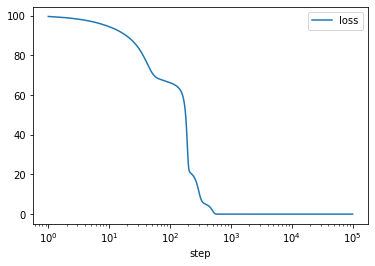

In [46]:
xs = list(range(num_updates+1))
plt.plot(xs[1:], loss_history[1:], label='loss')
plt.xlabel('step')
plt.xscale('log')
plt.legend()
print(f'Loss after training: {loss_history[-1]:.02e}')
plt.show()

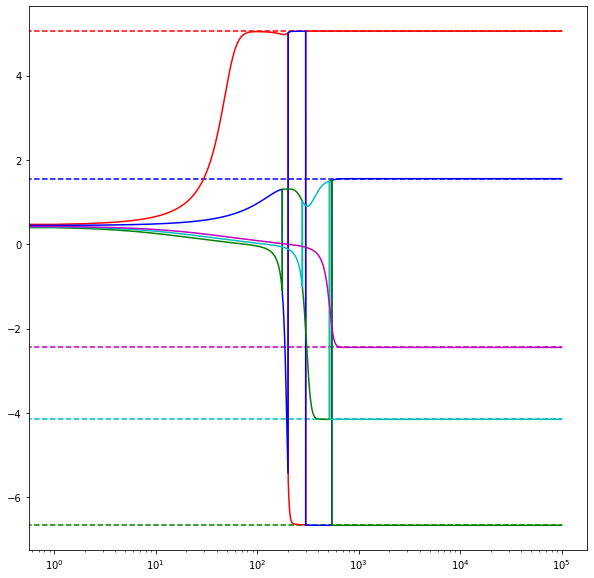

In [47]:
plt.figure(figsize=(10, 10))
eigvals = np.linalg.eigvals(R)
xs = list(range(eigval_history.shape[1]))
colors = ['r', 'b', 'g', 'c', 'm']
for i in range(d):
    plt.plot(eigval_history[i], color=colors[i])
    plt.hlines(eigvals[i], 0, len(xs), colors=colors[i], linestyles='dashed')

plt.xscale('log')

#### As we can see, even in the case of initialization with ones the eigenvalues may sometime converge to negative values, but for the $d=5$ some of them usually do not and the loss does not vanish even with $100000$ epochs.